
#Linear Regression Portfolio!!!

These small LinearRegression project aims to apply learned concept from course "Python for Data Science and Machine Learning Bootcamp" with Jose Portilla. The exercise aims to provide a data based decision on where should a company apply it efforts in order to raise clients Yearly Amount spent, by investing in AppTime or Time on Website. Data visualisation is made with seaborn library, data work with pandas library, math with numpy and machine learning with sklearn. features were evaluated and shown. The dataset was splitten in two, so there could be a train sample and a test one. The predictions made were evaluated by the sum of squares (R²). The coefficients showed that Time on App had a greater influence on yearly Amount spent. These could lead to the conclusion that the company should invest on keeping its client on App for grater time but also shows that there is room for growth sale by the website.

In [1]:
print("Exercise examples made by Thiago I. Klock as content for portfolio.")

Exercise examples made by Thiago I. Klock as content for portfolio.


In [30]:
import pandas as pd #For FataFrame manipulation.
import numpy as np #For Math.
import matplotlib.pyplot as plt # For plotting.
import seaborn as sns #For nice plotting.


In [15]:
print('Reading data base: Ecommerce_Customers_DataBase.')
customers = pd.read_csv("Ecommerce_Customers_DataBase")

Reading data base: Ecommerce_Customers_DataBase.


In [16]:
print('Reading Data Base head.')
customers.head(5)

Reading Data Base head.


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [17]:
print('Describing data basic statistics.')
customers.describe()

Describing data basic statistics.


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [18]:
print('Checking null values in data base.')
customers.info()
print('Non null values found.')

Checking null values in data base.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB
Non null values found.


In [59]:
sns.set_palette("BrBG")
sns.set_style('white')

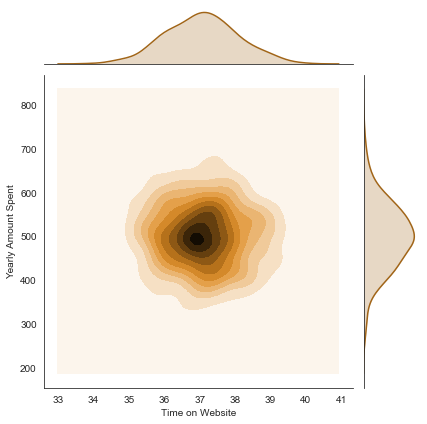

In [62]:
# More time on site, more money spent.
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers,kind='kde')



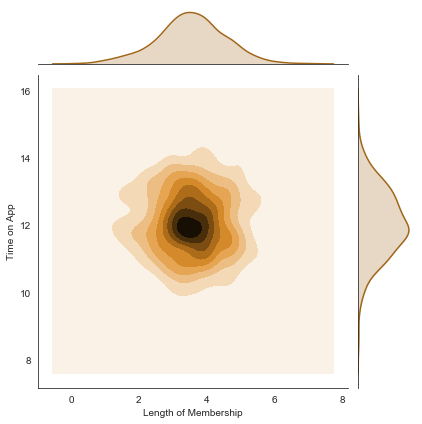

In [63]:
sns.jointplot(y='Time on App',x='Length of Membership',kind='kde',data=customers)

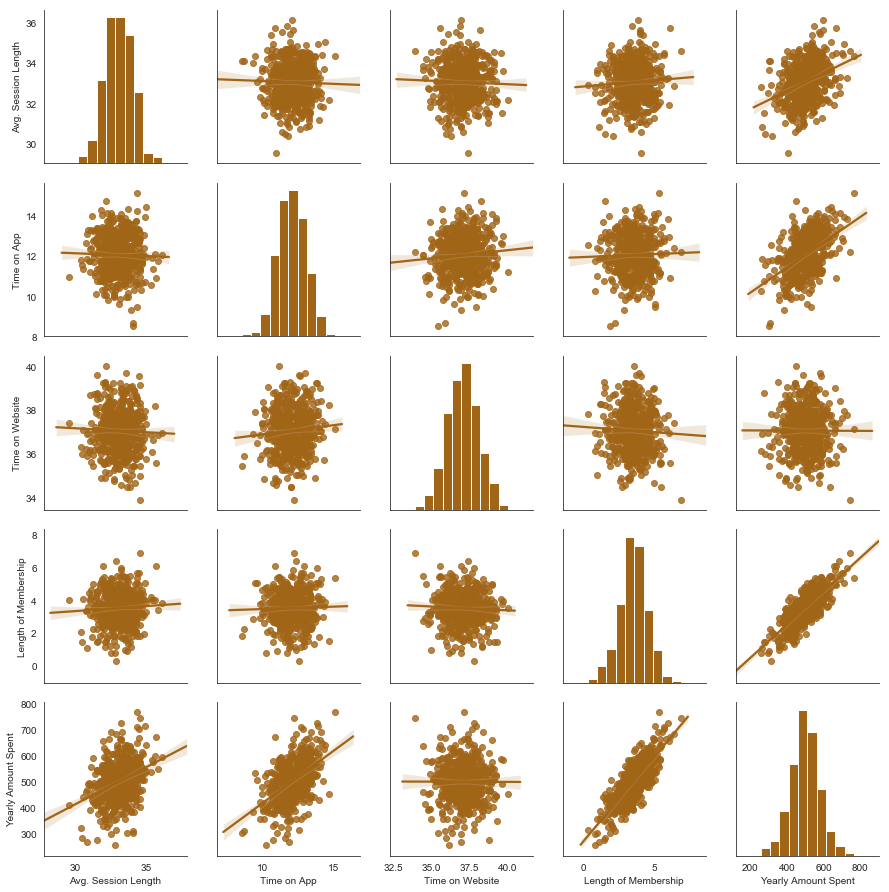

In [65]:
sns.pairplot(customers, kind ="reg")


The above image shows graphs in which a linear relation is clear.
It can be seen how the features relate between themselves.
The pair Yearly Amount Spent vs. Length of Membership stands out, so it should be looked closer.

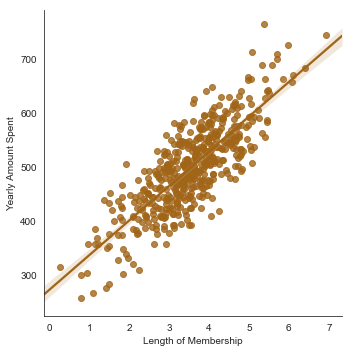

In [66]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

It is clear the direct relation between the length of Membership and the Yearly Amount Spent.

Training and Testing Data

With the data explored and displayed, the next step should be Training and Testing the Data.

In [134]:
y = customers['Yearly Amount Spent'] # picking just the "target data"

In [135]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']] #pickig the features data. Sticking just with the numeric ones.

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [79]:
from sklearn.model_selection import train_test_split #Importing the spliting function

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Training the Model with sklearn Linear Regression



In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
lm = LinearRegression()

In [84]:
lm.fit(X_train,y_train) #Fiting the linear Regression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

**Print out the coefficients of the model**

In [90]:

print('Coefficients: \n', lm.coef_)
print('Those are the coeficients for the linear regression model.')

Coefficients: 
 [25.69083176 38.68815596  0.45279908 61.71050259]
Those are the coeficients for the linear regression model.


{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

Predicting
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

In [92]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

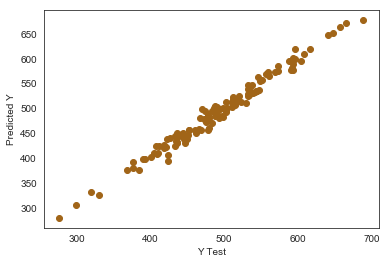

In [95]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Evaluating the Model

The Model's performance can be evaluated by calculating the residual sum of squares and the explained variance score (R^2).

In [97]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 8.460454170141151
MSE: 105.64514296279508
RMSE: 10.278382312542917


Conclusion:
In order to answer the original question of where should the company focus, "mobile app" or "website develpment" it is necessary to consider the below table where it is possible to see the weight of each feature on the yearly amont spent htat was provided by the Linear Regression model.

In [132]:
coeffs = pd.DataFrame(lm.coef_,X.columns)
coeffs.columns = ['Coeffecient']
print(coeffs)


                      Coeffecient
Avg. Session Length     25.690832
Time on App             38.688156
Time on Website          0.452799
Length of Membership    61.710503


Interpreting the coefficients:

- The Coeffecients could be interpreted as: # for each unit increased in **Avg. Session Length** increase of 25.98 total dollars spent happens.
                                            # for each unit increased in **Time on App** increase of 38.59 total dollars spent happens.
                                            # for each unit increased in **Time on Website** increase of 0.19 total dollars spent happens.
                                            # for each unit increased in **Length of Membership** increase of 61.27 total dollars spent happens.
                                           
                                           Taken the other 3 features are kept equal

Where should the company invest? App or Website?


Based on the numbers showed it is possible to affirm the time on App has a greater impact on the client spenditure, pointing that it might give a greater return keeping the client for longer periods. Although the return for time on Website is low, indicating there is much room for growth in the sector, i.e. with low investimenst could be greater returns. Benchmarking could provide data for these decision.

.